In [41]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
data= "http://bit.ly/w-data"

In [43]:
df = pd.read_csv(data)

In [44]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [45]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [47]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [48]:
df.shape

(25, 2)

In [49]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

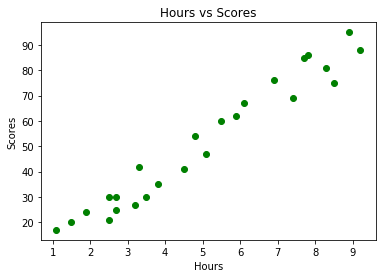

In [50]:
plt.scatter(x=df.Hours,y=df.Scores,color= 'green')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours vs Scores')
plt.show()

In [51]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [52]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

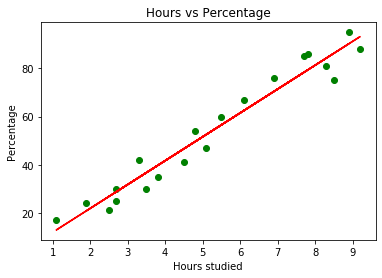

In [53]:
plt.scatter(x_train, y_train, color= 'green')
plt.plot( x_train, model.predict(x_train), color='red')
plt.xlabel('Hours studied')
plt.ylabel('Percentage')
plt.title('Hours vs Percentage')
plt.show()

In [54]:
y_pred = model.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [55]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


In [56]:
print('R2 score :', metrics.r2_score(y_test, y_pred))

R2 score : 0.9454906892105356


In [57]:
# Comparing Actual vs Predicted
print (np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[16.88414476 20.        ]
 [33.73226078 27.        ]
 [75.357018   69.        ]
 [26.79480124 30.        ]
 [60.49103328 62.        ]]


In [58]:
result= model.predict([[9.25]])
print ('The percentage is:',result)

The percentage is: [93.69173249]
